In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df=pd.read_csv('Mall_Customers.csv')

In [41]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [42]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [44]:
df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [45]:
df

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [46]:
#data analysis
df.describe()

,CustomerID,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [47]:
#data cleaning 
df.isna().sum()

CustomerID        0
Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [48]:
df.corr()

,CustomerID,Age,Annual Income,Spending Score
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income,0.977548,-0.012398,1.000000,0.009903
Spending Score,0.013835,-0.327227,0.009903,1.000000


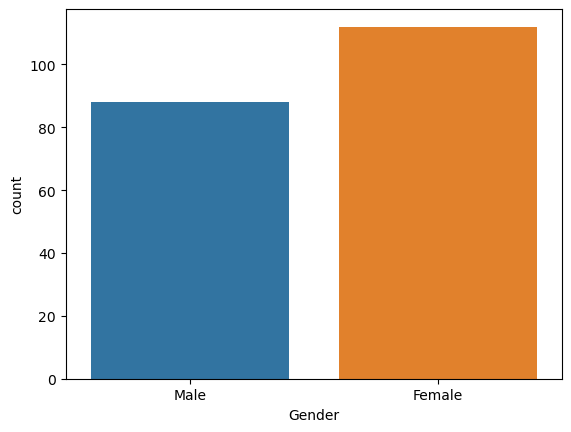

In [49]:
sns.countplot(x='Gender',data=df)
plt.show()

In [50]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

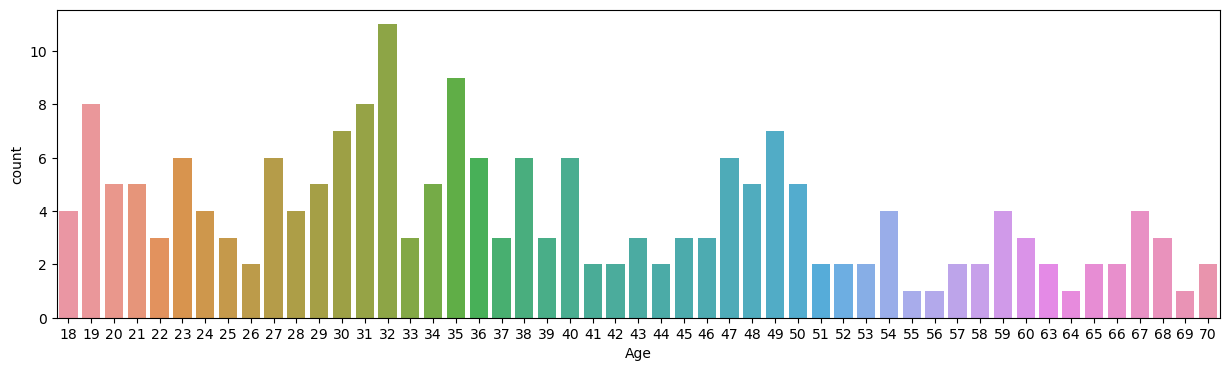

In [51]:
plt.figure(figsize=(15,4))
sns.countplot(x='Age',data=df)
plt.show()

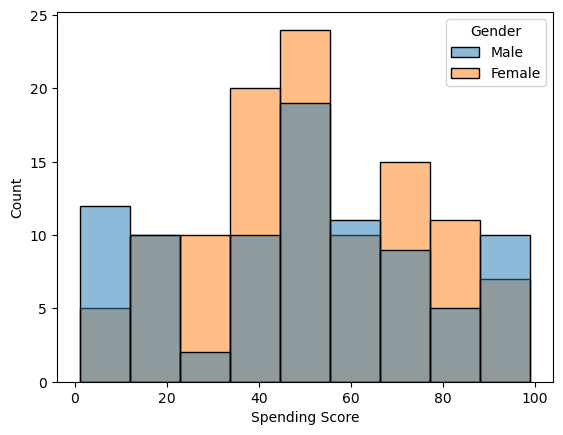

In [52]:
sns.histplot(x='Spending Score',data=df,hue='Gender')
plt.show()

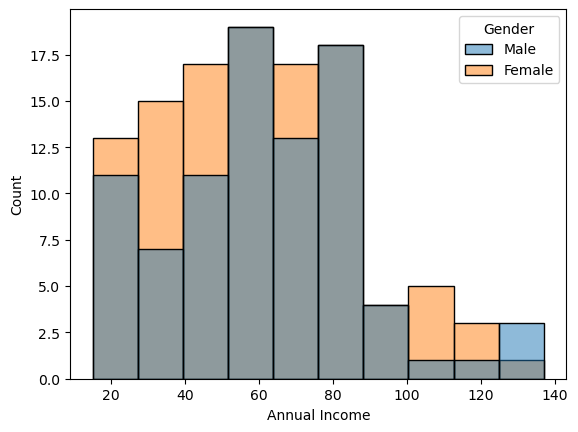

In [53]:
sns.histplot(x='Annual Income',data=df,hue='Gender')
plt.show()

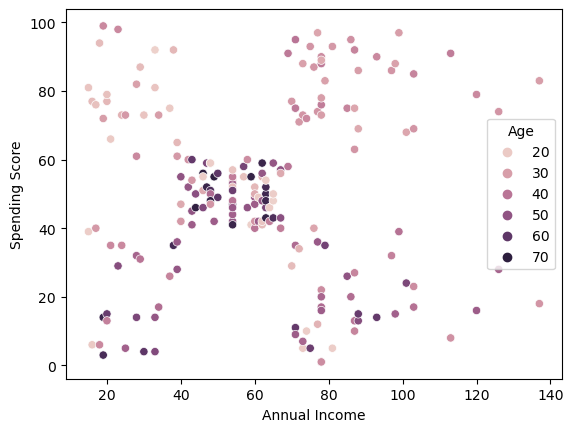

In [54]:
sns.scatterplot(x='Annual Income',y='Spending Score',data=df,hue='Age')
plt.show()

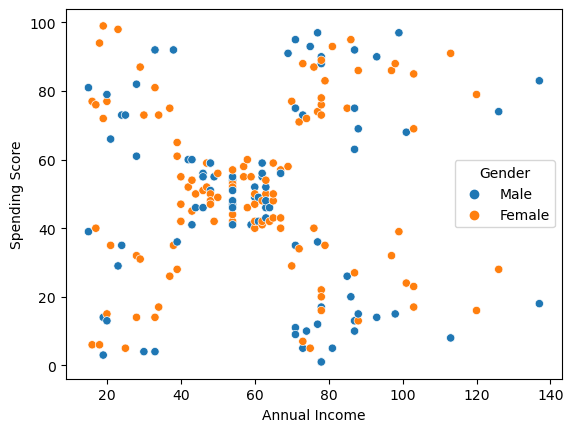

In [55]:
sns.scatterplot(x='Annual Income',y='Spending Score',data=df,hue='Gender')
plt.show()

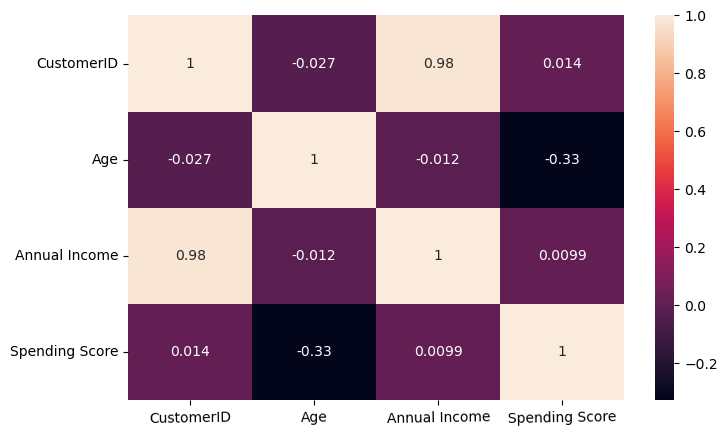

In [56]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.xticks(rotation=1)
plt.show()

In [57]:
x=df.iloc[:,[3,4]]

In [58]:
from sklearn.cluster import KMeans
wess=[]
for i in range(1,11):
    model=KMeans(n_clusters=i,init='random',random_state=1)
    model.fit(x)
    wess.append(model.inertia_)

In [59]:
wess

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37271.88623658949,
 30259.65720728547,
 25028.020475269415,
 21838.863692828912,
 19787.670554966855]

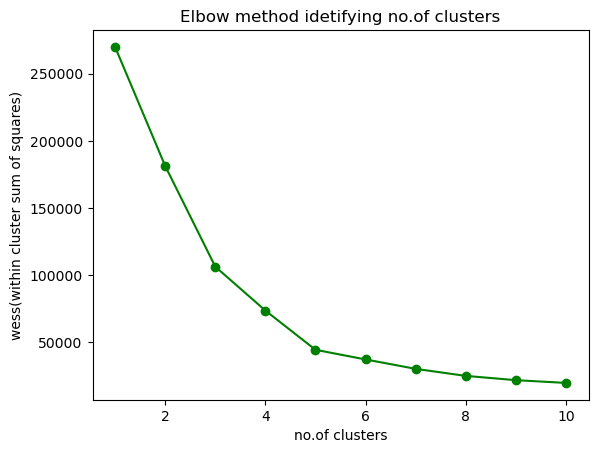

In [60]:
plt.title('Elbow method idetifying no.of clusters')
plt.plot(range(1,11),wess,'o-g')
plt.xlabel('no.of clusters')
plt.ylabel('wess(within cluster sum of squares)')
plt.show()

In [61]:
best_model=KMeans(n_clusters=5,init='random',random_state=1)
best_model.fit(x)

KMeans(init='random', n_clusters=5, random_state=1)

In [62]:
ypred=best_model.fit_predict(x)

In [63]:
ypred

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

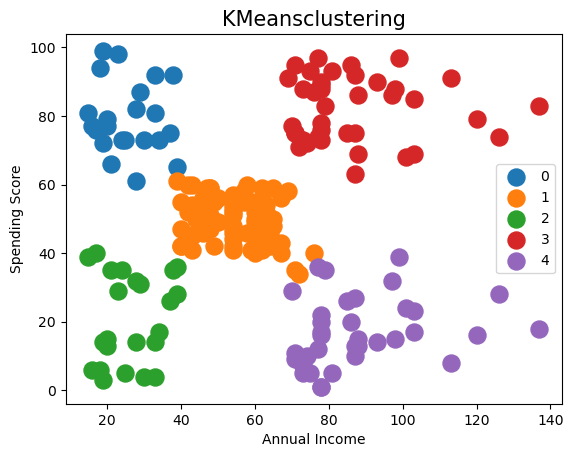

In [64]:
x=np.array(x)
nclusters=np.unique(ypred)
for i in nclusters:
    plt.scatter(x[ypred==i,0],x[ypred==i,1],label=i,s=150)
plt.title('KMeansclustering',fontsize=15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(False)
plt.legend()
plt.show()